Exploring the HR Employee Attrition Data

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import qdesc as qd

In [63]:
# Exploring the data on HR Employee Attrition
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Generating a frequency distribution for all the categorical features from the said data frame.
qd.freqdist(df, 'Attrition')

,Attrition,Count,Percentage
0,No,1233,83.877551
1,Yes,237,16.122449


In [8]:
# Generate descriptive analysis for Monthly rate when grouped by Attrition.
qd.grp_desc(df, 'MonthlyRate', 'Attrition')

,Attrition,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,No,1233,14265.78,7102.26,14120.0,6215.0,2094,26997,14.91,0.78
1,Yes,237,14559.31,7208.15,14618.0,6299.0,2326,26999,2.71,0.77


In [9]:
# Generate descriptive analysis for Performance Rating when grouped by Attrition.
qd.grp_desc(df, 'PerformanceRating', 'Attrition')

,Attrition,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,No,1233,3.15,0.36,3.0,0.0,3,4,363.18,0.78
1,Yes,237,3.16,0.36,3.0,0.0,3,4,69.29,0.77


In [10]:
# Generate descriptive analysis for Relationship Satisfaction when grouped by Attrition.
qd.grp_desc(df, 'RelationshipSatisfaction', 'Attrition')

,Attrition,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,No,1233,2.73,1.07,3.0,1.0,1,4,64.45,0.78
1,Yes,237,2.60,1.13,3.0,1.0,1,4,12.68,0.77


In [11]:
# Generate descriptive analysis for Total Working Years when grouped by Attrition.
qd.grp_desc(df, 'TotalWorkingYears', 'Attrition')

,Attrition,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,No,1233,11.86,7.76,10.0,4.0,0,38,37.39,0.78
1,Yes,237,8.24,7.17,7.0,3.0,0,40,8.50,0.77


In [12]:
# Generate descriptive analysis for Work life balance when grouped by Attrition.
qd.grp_desc(df, 'WorkLifeBalance', 'Attrition')

,Attrition,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,No,1233,2.78,0.68,3.0,0.0,1,4,130.49,0.78
1,Yes,237,2.66,0.82,3.0,0.0,1,4,18.35,0.77


In [40]:
# Selecting only the variables of interest
df1 = df[["MonthlyIncome", "PerformanceRating", "RelationshipSatisfaction", "WorkLifeBalance", "TotalWorkingYears"]]
df1

,MonthlyIncome,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,TotalWorkingYears
0,5993,3,1,1,8
1,5130,4,4,3,10
2,2090,3,2,3,7
3,2909,3,3,3,8
4,3468,3,4,3,6
...,...,...,...,...,...
1465,2571,3,3,3,17
1466,9991,3,1,3,9
1467,6142,4,2,3,6
1468,5390,3,4,2,17


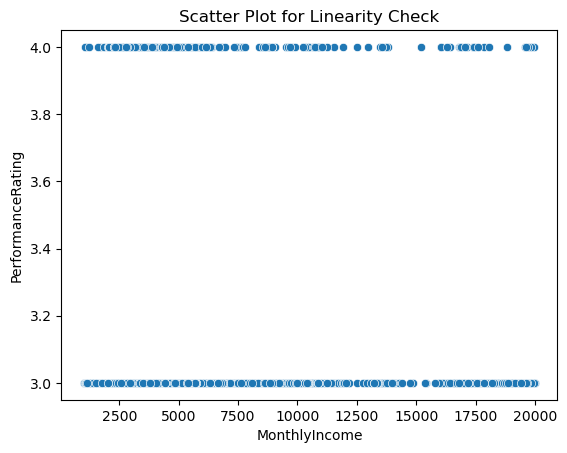

In [57]:
# Checking the linearity assumption of the variables Monthly Income and Performance Rating using a scatter plot.
sns.scatterplot(x=df1['MonthlyIncome'], y=df1['PerformanceRating'])
plt.title('Scatter Plot for Linearity Check')
plt.show()

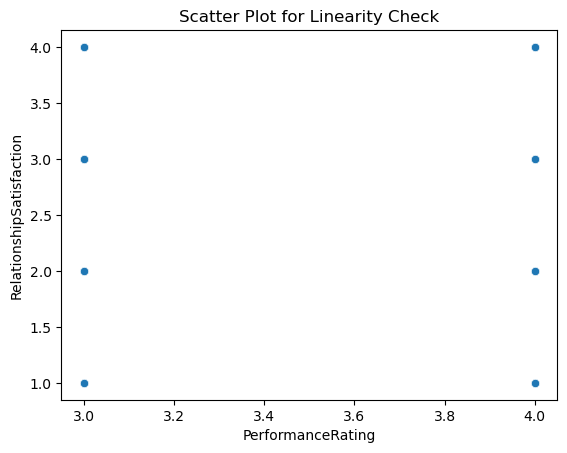

In [58]:
# Checking the linearity assumption of the variables Performance Rating and Relationship Satisfaction using a scatter plot.
sns.scatterplot(x=df1['PerformanceRating'], y=df1['RelationshipSatisfaction'])
plt.title('Scatter Plot for Linearity Check')
plt.show()

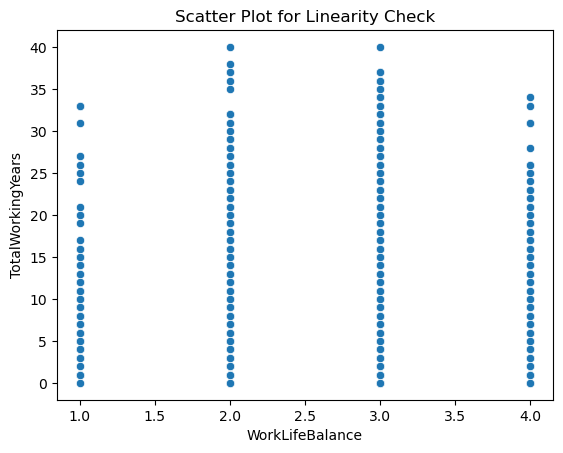

In [59]:
# Checking the linearity assumption of the variables Work life balance and Total Workign Years using a scatter plot.
sns.scatterplot(x=df1['WorkLifeBalance'], y=df1['TotalWorkingYears'])
plt.title('Scatter Plot for Linearity Check')
plt.show()


--- Variable: MonthlyIncome ---
  Anderson-Darling Statistic : 85.3906
  Critical Value (@ 5.0%) : 0.7850
  Decision : Reject Null


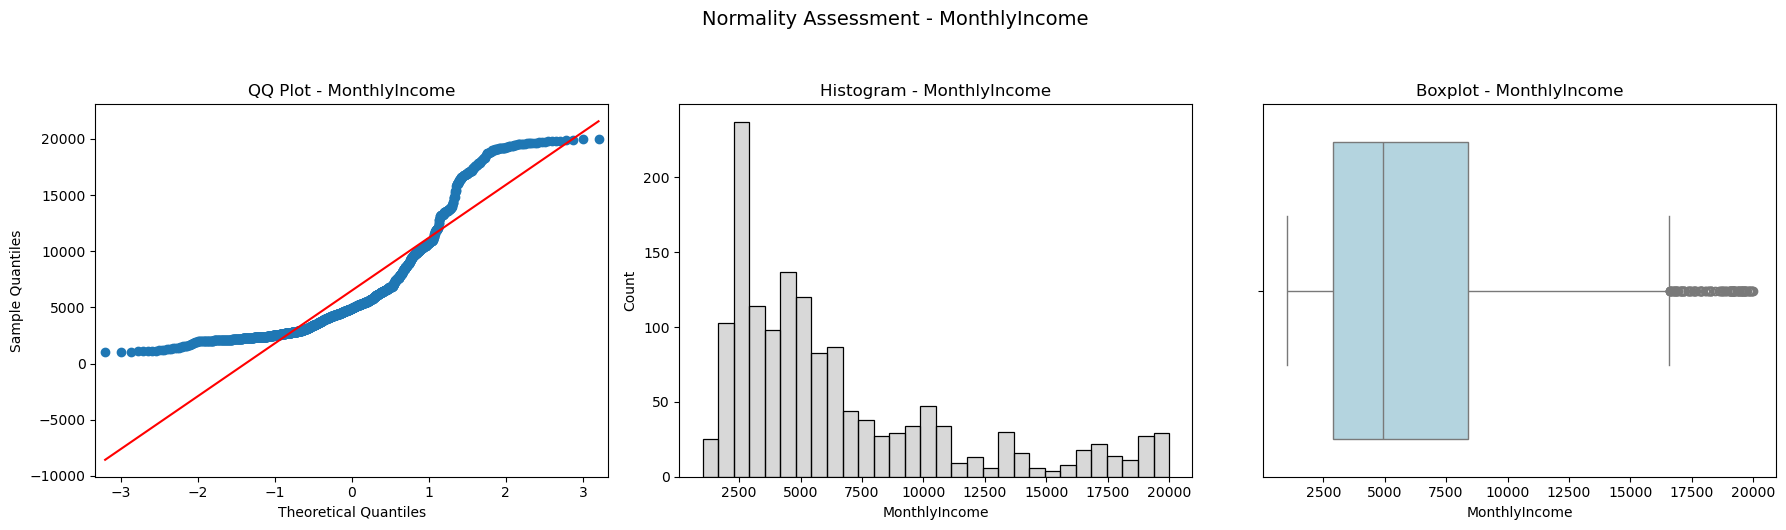


--- Variable: PerformanceRating ---
  Anderson-Darling Statistic : 432.5839
  Critical Value (@ 5.0%) : 0.7850
  Decision : Reject Null


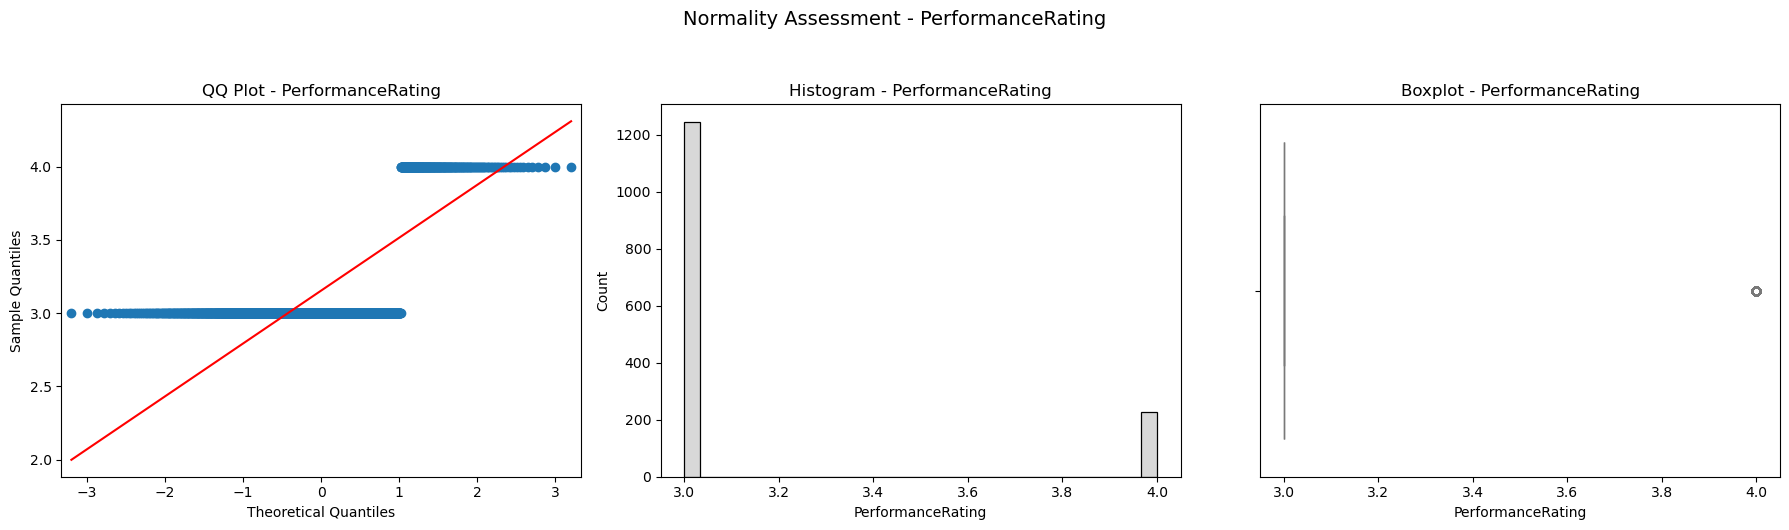


--- Variable: RelationshipSatisfaction ---
  Anderson-Darling Statistic : 76.8501
  Critical Value (@ 5.0%) : 0.7850
  Decision : Reject Null


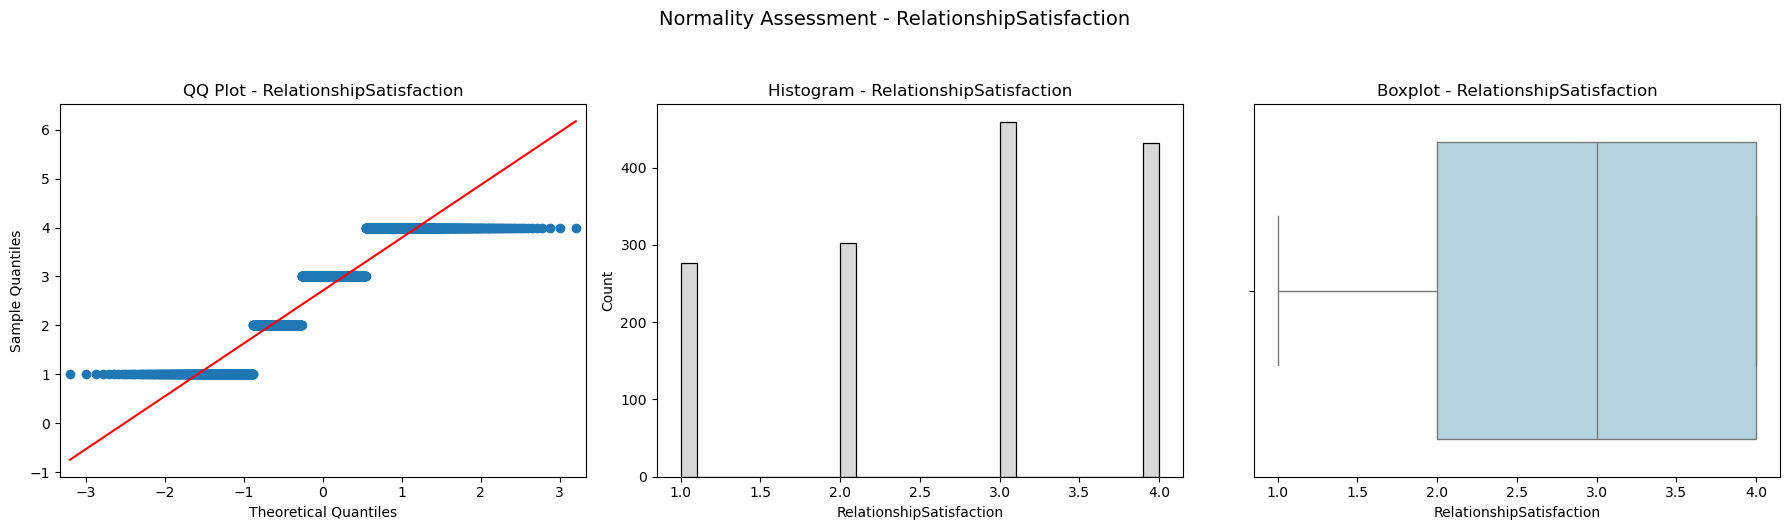


--- Variable: WorkLifeBalance ---
  Anderson-Darling Statistic : 147.4438
  Critical Value (@ 5.0%) : 0.7850
  Decision : Reject Null


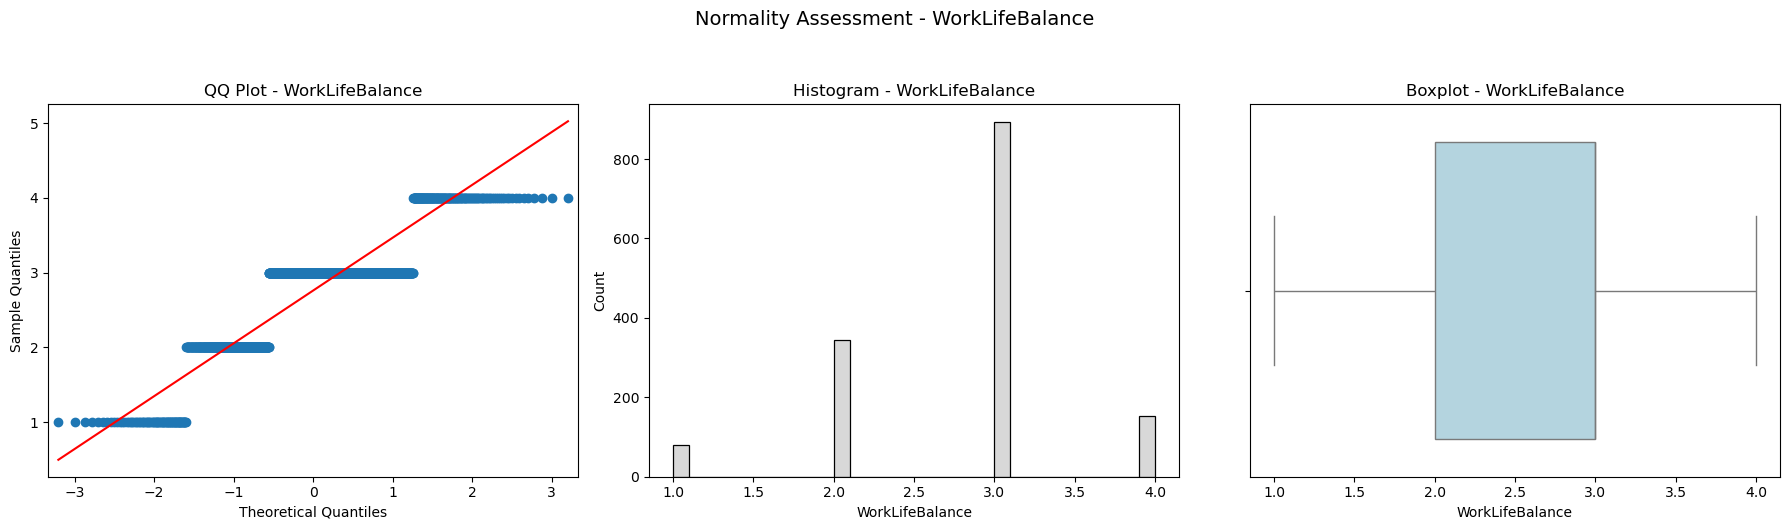


--- Variable: TotalWorkingYears ---
  Anderson-Darling Statistic : 43.5237
  Critical Value (@ 5.0%) : 0.7850
  Decision : Reject Null


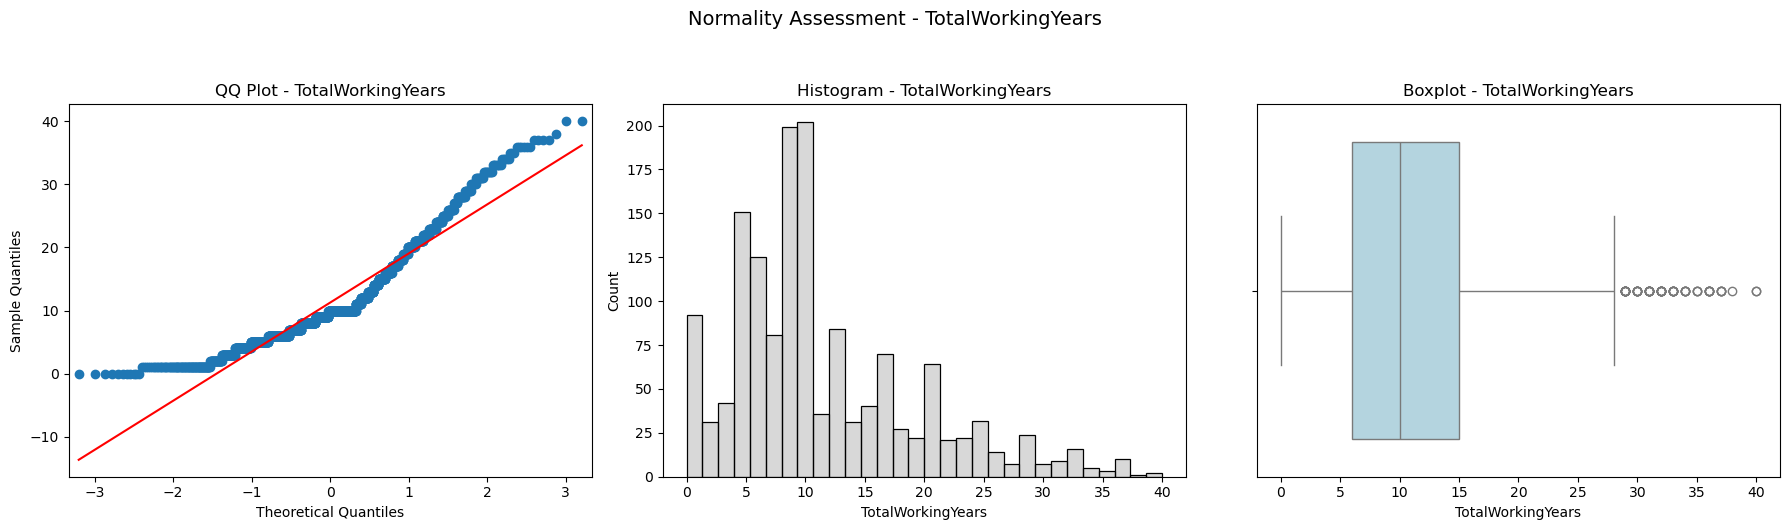

In [41]:
# Doing a normality check using histograms and AD-test
qd.normcheck_dashboard(df1)

In [61]:
# Choosing the Kendall's tau-b in analyzing the association between Monthly Income and Performance Rating given the assumption check results.
kendall_corr, kendall_p = stats.kendalltau(df1['MonthlyIncome'], df1['PerformanceRating'])
print(f"Kendall's Tau-b correlation coefficient: {kendall_corr:.4f}, p-value: {kendall_p:.4f}")

Kendall's Tau-b correlation coefficient: -0.0221, p-value: 0.3008


In [53]:
# Choosing the Kendall's tau-b in analyzing the association between Performance Rating and Relationship Satisfaction given the assumption check results
kendall_corr, kendall_p = stats.kendalltau(df1['PerformanceRating'], df1['RelationshipSatisfaction'])
print(f"Kendall's Tau-b correlation coefficient: {kendall_corr:.4f}, p-value: {kendall_p:.4f}")

Kendall's Tau-b correlation coefficient: -0.0302, p-value: 0.2061


In [62]:
# Choosing the Kendall's tau-b in analyzing the association between Work life balance and Total Working Years given the assumption check results
kendall_corr, kendall_p = stats.kendalltau(df1['WorkLifeBalance'], df1['TotalWorkingYears'])
print(f"Kendall's Tau-b correlation coefficient: {kendall_corr:.4f}, p-value: {kendall_p:.4f}")

Kendall's Tau-b correlation coefficient: 0.0023, p-value: 0.9120
